In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv("./datas/Marvel Vs DC NEW.csv")

In [4]:
df.shape

(1690, 7)

In [5]:
df = df.drop(['Year'], axis=1)

In [6]:
df.isnull().sum()   

ID             0
Movie          0
Genre          7
RunTime        0
Description    0
IMDB_Score     0
dtype: int64

In [7]:
# null인 행 지우기
df = df.dropna(subset=['Genre'])
print(df.isnull().sum())

ID             0
Movie          0
Genre          0
RunTime        0
Description    0
IMDB_Score     0
dtype: int64


In [8]:
df.shape

(1683, 6)

In [9]:
# RunTime이 (String)0인 행 지우기
df = df[df['RunTime'] != '0']

# IMDB_Score가 0인 행의 개수, 11개만 있으므로 평점이 입력되지 않은게 아니라 평점을 0.0으로 입력한 것으로 간주
print(df[df['IMDB_Score'] == 0.0]) 


        ID                      Movie                    Genre  RunTime  \
5        5                Black Widow  Action,Adventure,Sci-Fi  133 min   
36      36                    Hawkeye   Action,Adventure,Crime   60 min   
243    243                   The Talk                Talk-Show   38 min   
244    244    The Drew Barrymore Show                Talk-Show   44 min   
517    517                 Metropolis       Action,Crime,Drama   60 min   
529    529                 Project 13       Action,Crime,Drama   45 min   
570    570                  Film Club              Documentary   45 min   
584    584  The Super Human In Us All              Documentary   49 min   
1074  1074        Krypto the Superdog  Animation,Action,Comedy   22 min   
1521  1521                   Gruen XL         Comedy,Talk-Show   37 min   
1571  1571        DC Super Hero Girls   Animation,Short,Action   21 min   

                                            Description  IMDB_Score  
5     A film about Natasha Ro

In [10]:
df.shape

(1406, 6)

In [11]:
# 데이터 정제
df.columns = df.columns.str.strip()
df['IMDB_Score'] = pd.to_numeric(df['IMDB_Score'], errors='coerce')
df['RunTime'] = df['RunTime'].str.replace(' min', '', regex=False)

In [12]:
df.shape

(1406, 6)

In [13]:
# 여기서 Marvel과 DC 데이터 분류하기

marvel = [
    'The Falcon and the Winter Soldier', 'WandaVision', 'Black Widow','Avengers: Endgame', 'Guardians of the Galaxy', 'Spider-Man: Far from Home',
    'Thor: Ragnarok', 'Avengers: Infinity War', 'Black Panther','Captain Marvel', 'Spider-Man: Homecoming', 'Avengers: Age of Ultron',
    'Captain America: The First Avenger', 'Guardians of the Galaxy Vol. 2','Thor', 'Iron Man', 'Captain America: Civil War', 'The Avengers',
    'Doctor Strange', 'Ant-Man', 'Captain America: The Winter Soldier','Iron Man 3', 'Thor: The Dark World', 'Iron Man 2', 'Spider-Man 3',
    'Ant-Man and the Wasp', 'The Incredible Hulk', 'Hawkeye', 'Jessica Jones', 'Luke Cage', 'Agents of S.H.I.E.L.D.', 'The Punisher',
    'Marvel Studios: Legends', 'Marvel Studios: Assembled','Iron Man: Armored Adventures', 'Marvel One-Shot: Agent Carter',
    'Marvel One-Shot: Item 47', 'Marvel One-Shot: The Consultant','The Invincible Iron Man', 'Wolverine', 'X-Men: Evolution',
    'Eternals', 'Loki', 'Spider-Man: No Way Home', 'Thor: Love and Thunder', 'Shang-Chi and the Legend of the Ten Rings', 'Doctor Strange in the Multiverse of Madness', 'What If...?',
    'Black Panther: Wakanda Forever','Guardians of the Galaxy Vol. 3','The Marvels','Moon Knight','Ms. Marvel','She-Hulk','Secret Invasion','Deadpool 3','Fantastic Four','Ironheart',
    'Armor Wars','I Am Groot','Echo','The Guardians of the Galaxy Holiday Special'
]

dc = [
    'Wonder Woman 1984', 'Joker', 'The Dark Knight', 'Watchmen', 'Suicide Squad', 'The Dark Knight Rises', 'Doom Patrol', 'Aquaman','Man of Steel', 'Shazam!', 'Batman v Superman: Dawn of Justice',
    'Batman Begins', 'Batman', 'Batman & Robin', 'Constantine', 'Batman Forever', 'Superman', 'Justice Society: World War II',
    'Green Lantern', 'Batman Returns', 'Superman Returns','Arrow', 'Gotham', 'Smallville', 'The Flash', 'Supergirl',
    'Young Justice', 'Teen Titans', 'Krypton', 'Justice League Unlimited','Justice League', 'Catwoman', 'Batman Beyond', 'Swamp Thing',
    'Batman: The Animated Series', 'Superman: The Animated Series',"DC's Legends of Tomorrow", 'Black Lightning', 'The Suicide Squad','The Batman','The Sandman','Batman: The Long Halloween, Part One',
    'Justice League Part Two','Batman: Arkham Asylum','Green Lantern Corps','Gotham City Sirens','Deadshot','Deathstroke','Zatanna',
    'Batman: Knightfall','DC Fandome','100 Bullets','Aquaman: Battle for Atlantis','The Suicide Squad','The Batman','The Sandman','Batman: The Long Halloween, Part One',
    'Justice League Part Two','Batman: Arkham Asylum','Green Lantern Corps','Gotham City Sirens','Deadshot','Deathstroke','Zatanna','Batman: Knightfall','DC Fandome','100 Bullets','Aquaman: Battle for Atlantis'
]
company = []
for row in df['Movie']:
    if row in marvel:
        company.append('Marvel')
    elif row in dc:
        company.append('DC')
    else:
        company.append('-1')
        
df['Company'] = company
df = df[df['Company'] != '-1']

print(df)

        ID                              Movie                    Genre  \
2        2  The Falcon and the Winter Soldier   Action,Adventure,Drama   
3        3                        WandaVision      Action,Comedy,Drama   
5        5                        Black Widow  Action,Adventure,Sci-Fi   
6        6                  Avengers: Endgame   Action,Adventure,Drama   
7        7            Guardians of the Galaxy  Action,Adventure,Comedy   
...    ...                                ...                      ...   
1685  1685           DC's Legends of Tomorrow   Action,Adventure,Drama   
1686  1686                          Supergirl   Action,Adventure,Drama   
1687  1687                          Supergirl   Action,Adventure,Drama   
1688  1688                          Supergirl   Action,Adventure,Drama   
1689  1689                          Supergirl   Action,Adventure,Drama   

     RunTime                                        Description  IMDB_Score  \
2         50  Following the even

In [14]:
print(df[df['Company'] == '-1'].count())

ID             0
Movie          0
Genre          0
RunTime        0
Description    0
IMDB_Score     0
Company        0
dtype: int64


In [15]:
df.shape

(1028, 7)

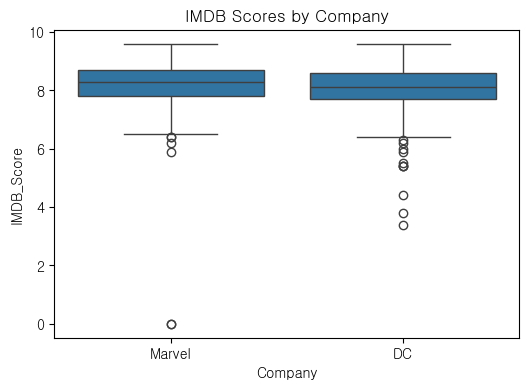

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d import Axes3D

# 회사별 IMDB 점수 분포
plt.figure(figsize=(6, 4))
sns.boxplot(x='Company', y='IMDB_Score', data=df)
plt.title('IMDB Scores by Company')
plt.show()

C:\Users\manun\AppData\Local\Temp\ipykernel_19748\616338317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Company', y='IMDB_Score', data=df,


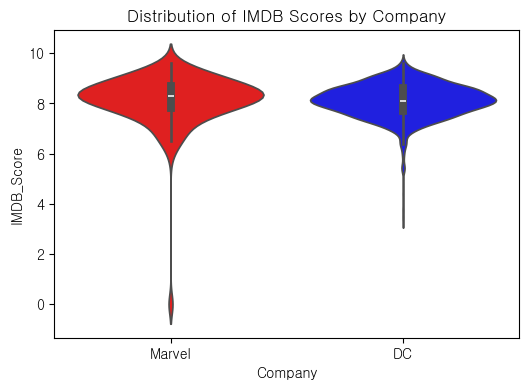

In [17]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Company', y='IMDB_Score', data=df,
               palette={'Marvel':'#FF0000',
                        'DC': "#0000FF",
                        '-1': "#808080"
                        }
               )
plt.title('Distribution of IMDB Scores by Company')
plt.show()

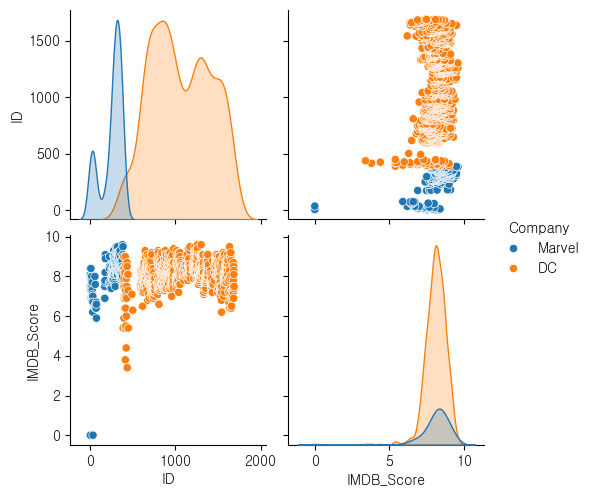

In [18]:
# pairplot 생성
sns.pairplot(df, hue='Company')
plt.show()

In [19]:
df.head(3)

,ID,Movie,Genre,RunTime,Description,IMDB_Score,Company
2,2,The Falcon and the Winter Soldier,"Action,Adventure,Drama",50,"Following the events of 'Avengers: Endgame,' S...",7.5,Marvel
3,3,WandaVision,"Action,Comedy,Drama",350,Blends the style of classic sitcoms with the M...,8.1,Marvel
5,5,Black Widow,"Action,Adventure,Sci-Fi",133,A film about Natasha Romanoff in her quests be...,0.0,Marvel


(3070, 7)


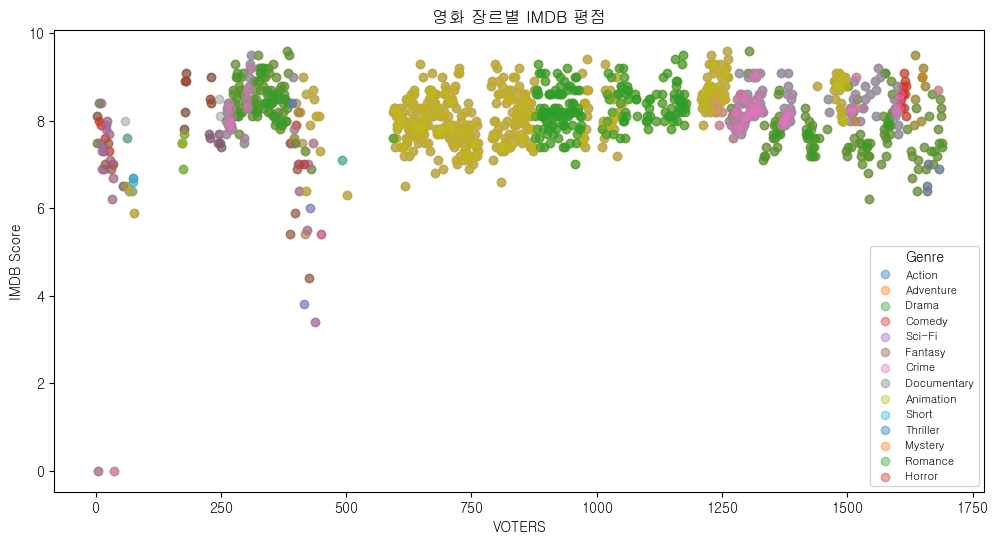

['Action' 'Adventure' 'Drama' 'Comedy' 'Sci-Fi' 'Fantasy' 'Crime'
 'Documentary' 'Animation' 'Short' 'Thriller' 'Mystery' 'Romance' 'Horror']


In [25]:
# 영화 장르와 평점 간 관계 플롯
# 현재 한 영화에 장르가 여러개 존재 -> 이걸 여러 행으로 분해, 이때 평점은 똑같게
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

new_row = []
for idx, row in df.iterrows():
    genres = row['Genre'].split(',')
    # 각각의 장르 1개를 가진 열로 분해
    for genre in genres:
        each_row = row.copy()
        each_row['Genre'] = genre
        new_row.append(each_row)
        
df_for_genre_score_scatter = pd.DataFrame(new_row)
print(df_for_genre_score_scatter.shape)
df_for_genre_score_scatter

labelEncoder = LabelEncoder()
genre_lebel = labelEncoder.fit_transform(df_for_genre_score_scatter['Genre'])

plt.figure(figsize=(12, 6))


for genre in df_for_genre_score_scatter['Genre'].unique():
    plt.scatter(
        df_for_genre_score_scatter['ID'][df_for_genre_score_scatter['Genre'] == genre],
        df_for_genre_score_scatter['IMDB_Score'][df_for_genre_score_scatter['Genre'] == genre],
        label = genre,
        alpha=0.4
    )

plt.title('영화 장르별 IMDB 평점')
plt.xlabel('VOTERS')
plt.ylabel('IMDB Score')
plt.legend(
        title="Genre",
        loc="lower right",
        fontsize=8)
plt.grid(False)
plt.show()

print(df_for_genre_score_scatter['Genre'].unique())

In [ ]:
df

,ID,Movie,Genre,RunTime,Description,IMDB_Score,Company
2,2,The Falcon and the Winter Soldier,"Action,Adventure,Drama",50,"Following the events of 'Avengers: Endgame,' S...",7.5,Marvel
3,3,WandaVision,"Action,Comedy,Drama",350,Blends the style of classic sitcoms with the M...,8.1,Marvel
5,5,Black Widow,"Action,Adventure,Sci-Fi",133,A film about Natasha Romanoff in her quests be...,0.0,Marvel
6,6,Avengers: Endgame,"Action,Adventure,Drama",181,After the devastating events of Avengers: Infi...,8.4,Marvel
7,7,Guardians of the Galaxy,"Action,Adventure,Comedy",121,A group of intergalactic criminals must pull t...,8.0,Marvel
...,...,...,...,...,...,...,...
1685,1685,DC's Legends of Tomorrow,"Action,Adventure,Drama",42,"Worlds lived, worlds died. Nothing will ever b...",8.5,DC
1686,1686,Supergirl,"Action,Adventure,Drama",42,"In the wake of Lex Luthor's return, the show f...",8.3,DC
1687,1687,Supergirl,"Action,Adventure,Drama",42,Kara comes face to face with Red Daughter and ...,8.1,DC
1688,1688,Supergirl,"Action,Adventure,Drama",42,Kara and Lena head to Kaznia to hunt down Lex....,7.4,DC


In [ ]:
# 영화별 평점 평균 구하기기
movie_score_group = df.groupby('Movie')['IMDB_Score'].mean().sort_values(ascending=True)
length = np.arange(movie_score_group.size)

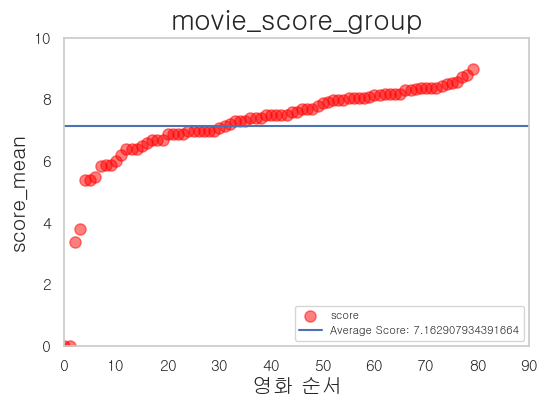

평균 평점: 7.162907934391664
최고 평점: 9.0, 영화 : The Dark Knight
최저 평점: 0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 각 영화 평점 평균을 모두 표시한 것
plt.figure(figsize=(6, 4))
plt.scatter(length, movie_score_group.values, alpha=0.5, s=65, color='red', label='score') 
plt.title('movie_score_group', fontsize=20)
plt.xlabel('영화 순서', fontsize=15)
plt.ylabel('score_mean', fontsize=15)
plt.axhline(y=movie_score_group.mean(), linestyle='-', label=f'Average Score: {movie_score_group.mean()}')
plt.ylim(0, 10)
plt.xlim(0, 90)
plt.grid(False)
plt.legend(fontsize=8, loc='lower right')
plt.show()

print(f"평균 평점: {movie_score_group.mean()}")
print(f"최고 평점: {movie_score_group.max()}, 영화 : {movie_score_group.index[79]}")
print(f"최저 평점: {movie_score_group.min()}")

In [ ]:
df_movie_score_group = pd.DataFrame(movie_score_group[-10:][:]).round(2)


C:\Users\manun\AppData\Local\Temp\ipykernel_22556\3704967198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Score',


<Axes: xlabel='IMDB_Score', ylabel='Movie'>

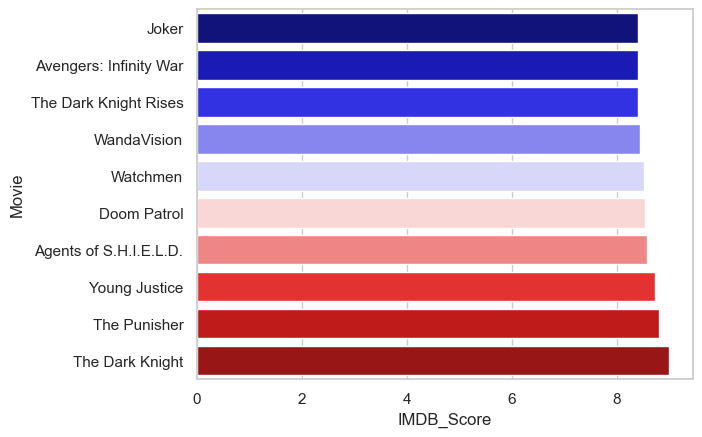

In [ ]:

# 상위 영화 10개를 뽑아서 바 차트 만들기
width = 0.5

sns.set_theme(style="whitegrid")
sns.barplot(x='IMDB_Score',
            y='Movie',
            data=pd.DataFrame(df_movie_score_group[-10:][:]),
            orient='h',
            palette='seismic'
            )

C:\Users\manun\AppData\Local\Temp\ipykernel_22556\1853719377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Score',


<Axes: xlabel='IMDB_Score', ylabel='Movie'>

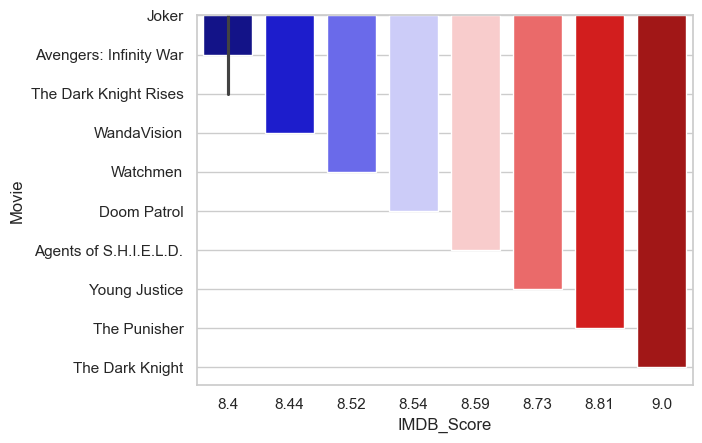

In [ ]:

# 상위 영화 10개를 뽑아서 바 차트 만들기

sns.set_theme(style="whitegrid")
sns.barplot(x='IMDB_Score',
            y='Movie',
            data=pd.DataFrame(df_movie_score_group[-10:][:]),
            orient='v',
            palette='seismic'
            )

In [ ]:
# Genre에서 ,을 ' '로 변경
df['Genre'] = df['Genre'].str.replace(',', ' ')
df.head()

,ID,Movie,Genre,RunTime,Description,IMDB_Score,Company
2,2,The Falcon and the Winter Soldier,Action Adventure Drama,50,"Following the events of 'Avengers: Endgame,' S...",7.5,Marvel
3,3,WandaVision,Action Comedy Drama,350,Blends the style of classic sitcoms with the M...,8.1,Marvel
5,5,Black Widow,Action Adventure Sci-Fi,133,A film about Natasha Romanoff in her quests be...,0.0,Marvel
6,6,Avengers: Endgame,Action Adventure Drama,181,After the devastating events of Avengers: Infi...,8.4,Marvel
7,7,Guardians of the Galaxy,Action Adventure Comedy,121,A group of intergalactic criminals must pull t...,8.0,Marvel


In [ ]:
from collections import Counter
from kiwipiepy import Kiwi

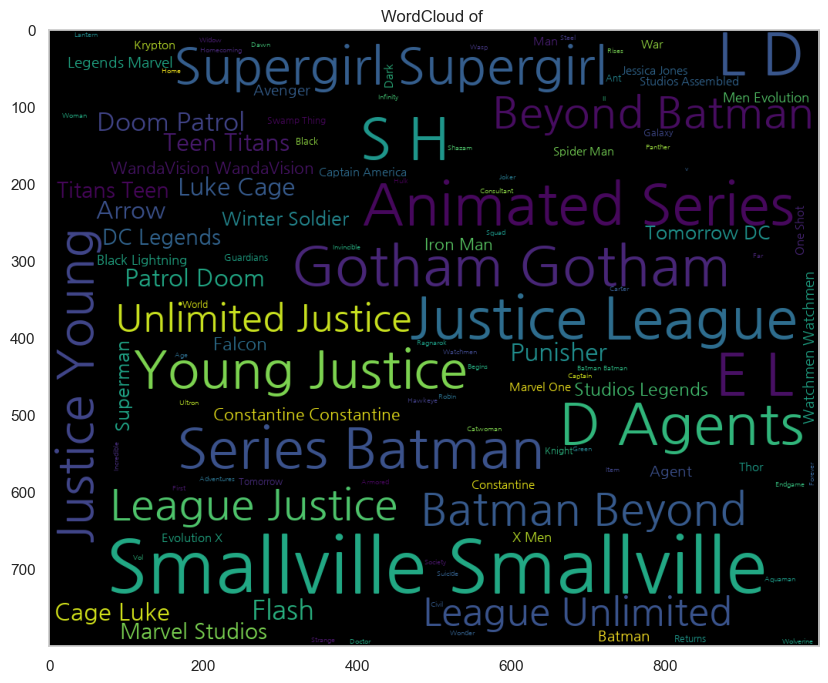

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 가장 많이 나온 영화 이름 찾기
word_cloud = WordCloud(
    font_path="C:\\Users\\manun\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf",
    width=1000,
    height=800,
).generate(' '.join(df['Movie']))

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.title("WordCloud of ")
plt.grid(False)
plt.show()

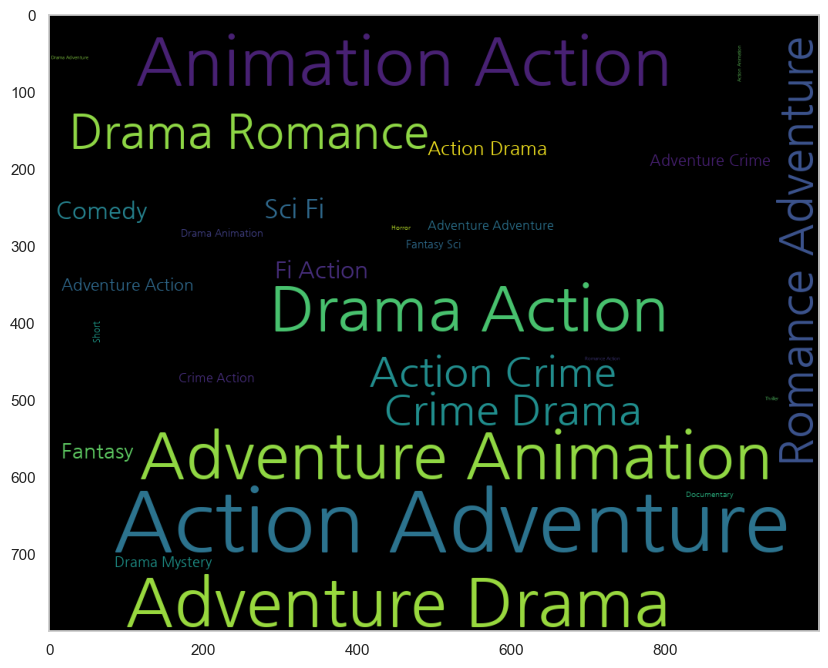

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(
    font_path="C:\\Users\\manun\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf",
    width=1000,
    height=800,
).generate(' '.join(df['Genre']))

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.grid(False)
plt.show()

In [ ]:
# 장르와, 각 장르의 개수를 차트로!
print(df.head())

   ID                              Movie                    Genre RunTime  \
2   2  The Falcon and the Winter Soldier   Action Adventure Drama      50   
3   3                        WandaVision      Action Comedy Drama     350   
5   5                        Black Widow  Action Adventure Sci-Fi     133   
6   6                  Avengers: Endgame   Action Adventure Drama     181   
7   7            Guardians of the Galaxy  Action Adventure Comedy     121   

                                         Description  IMDB_Score Company  
2  Following the events of 'Avengers: Endgame,' S...         7.5  Marvel  
3  Blends the style of classic sitcoms with the M...         8.1  Marvel  
5  A film about Natasha Romanoff in her quests be...         0.0  Marvel  
6  After the devastating events of Avengers: Infi...         8.4  Marvel  
7  A group of intergalactic criminals must pull t...         8.0  Marvel  


In [ ]:
genres = ""
for len in df['Genre'].unique():
    len = len.replace('-', '')
    genres += (len + " ")
    
from kiwipiepy import Kiwi

kiwi = Kiwi(model_type="sbg")
committed_tags = set(["NNG", "NNP"])

tag_counter = Counter()

list_words = [token.form for token in kiwi.tokenize(genres)]

tag_counter.update(list_words)



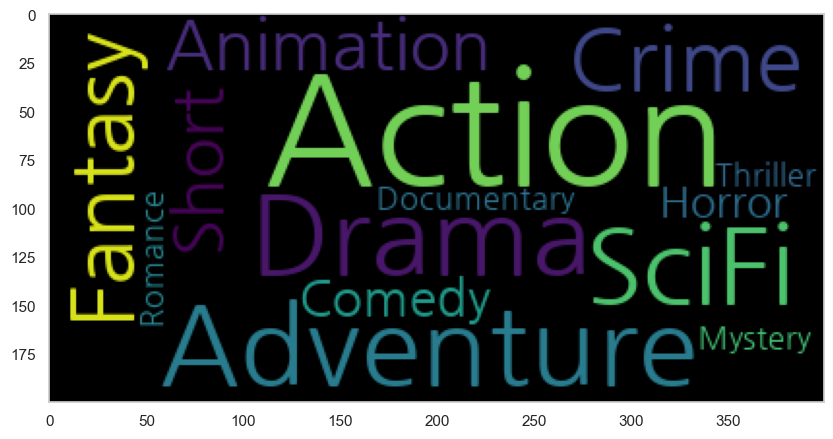

In [ ]:
word_cloud = WordCloud(
    font_path="C:\\Users\\manun\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf"
)
wc_figure = word_cloud.generate_from_frequencies(tag_counter)

plt.figure(figsize=(10, 8))
plt.imshow(wc_figure)
plt.grid(False)
plt.show()

In [ ]:
df.head()

,ID,Movie,Genre,RunTime,Description,IMDB_Score,Company
2,2,The Falcon and the Winter Soldier,Action Adventure Drama,50,"Following the events of 'Avengers: Endgame,' S...",7.5,Marvel
3,3,WandaVision,Action Comedy Drama,350,Blends the style of classic sitcoms with the M...,8.1,Marvel
5,5,Black Widow,Action Adventure Sci-Fi,133,A film about Natasha Romanoff in her quests be...,0.0,Marvel
6,6,Avengers: Endgame,Action Adventure Drama,181,After the devastating events of Avengers: Infi...,8.4,Marvel
7,7,Guardians of the Galaxy,Action Adventure Comedy,121,A group of intergalactic criminals must pull t...,8.0,Marvel
